In [ ]:
# Install packages from requirements.txt

#%pip install -r requirements.txt

# imports

In [7]:
# Set the working directory and adjust the Python path
import os
import sys
import numpy as np
from time import time

# Set the working directory to the src directory
os.chdir('./')
sys.path.append(os.getcwd())

from configuration.algorithm_settings import settings
from scripts.utils.generators import *
from scripts.utils.graph_visualizer import draw_graph
from scripts.utils.toy_city_generators import *

from collections import Counter

from scripts.utils.roulette_selection import roulette_wheel_selection

import pprint
from scripts.utils.route_finder import dijkstra
import copy


# get graph map

In [8]:
size=20
fixed_weight=1

map_graph = generate_square_city_graph(size, fixed_weight)

In [9]:
buses_graph = generate_bus_line_square_city(size, fixed_weight)
map_graph_walking = map_graph
full_graph = merge_bus_and_map_graph(copy.deepcopy(map_graph),buses_graph)

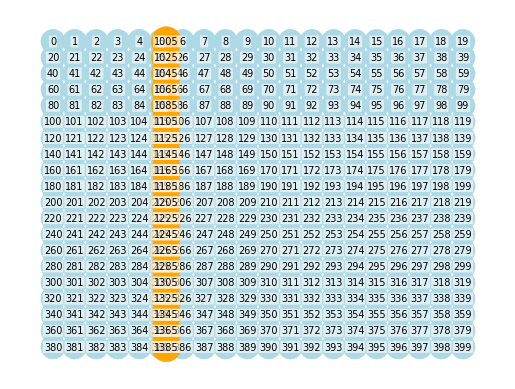

In [10]:
draw_graph(full_graph)

# run ACO algorithms

### configuration setup

In [14]:
from scripts.ant_colony_simple_ACO.ant_colony_optimization import ACO
from scripts.ant_colony_system.ant_colony_system import ACS
from scripts.ant_best_worst.ant_colony_best_worst import ABW
from scripts.ant_max_min.ant_colony_MAXMIN import ACS_MAXMIN

start_node = 1
end_node = 397
num_ants = 80
evaporation_rate = 0.35
initial_pheromone_lvl = 0.5
heuristic_weight = 1.0
pheromone_weight = 0.35

epomax = 1000
local_evap_rate = 0.1
transition_prob = 0.2


### DIKjSTRA comparison

Dijkstra full (bus+walk): [1, 2, 3, 4, 5, 1005, 1025, 1045, 1065, 1085, 1105, 1125, 1145, 1165, 1185, 1205, 1225, 1245, 1265, 1285, 1305, 1325, 1345, 1365, 1385, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397]
Cost: 28.110000000000003
Dijkstra walk only: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 37, 57, 77, 97, 117, 137, 157, 177, 197, 217, 237, 257, 277, 297, 317, 337, 357, 377, 397]
Cost: 35.0


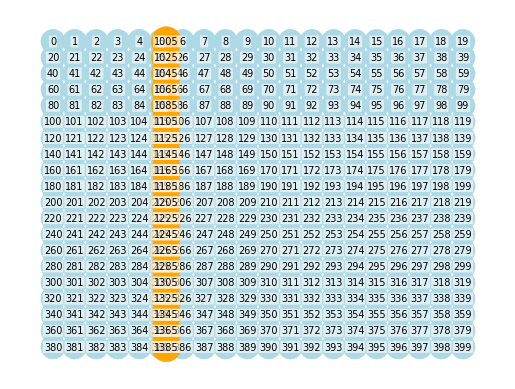

In [15]:
def _route_cost(graph, path):
    total = 0.0
    for a,b in zip(path, path[1:]):
        idx = graph['connections'][a].index(b)
        total += graph['weights'][a][idx]
    return total

route_full = dijkstra(full_graph, start_node, end_node)
route_walk = dijkstra(map_graph_walking, start_node, end_node)
print('Dijkstra full (bus+walk):', route_full)
print('Cost:', _route_cost(full_graph, route_full))
print('Dijkstra walk only:', route_walk)
print('Cost:', _route_cost(map_graph_walking, route_walk))

draw_graph(full_graph, route_full)

### Ant Colony Simple (ACO)

results for ant_colony_simple (ACO)
[1, 2, 3, 23, 43, 44, 45, 65, 85, 86, 87, 88, 108, 109, 110, 130, 150, 151, 152, 153, 173, 193, 213, 214, 234, 254, 255, 256, 276, 296, 316, 336, 337, 357, 377, 397]
cost:  35.0
time spent for a solution:  22.913244485855103
epochs:  202


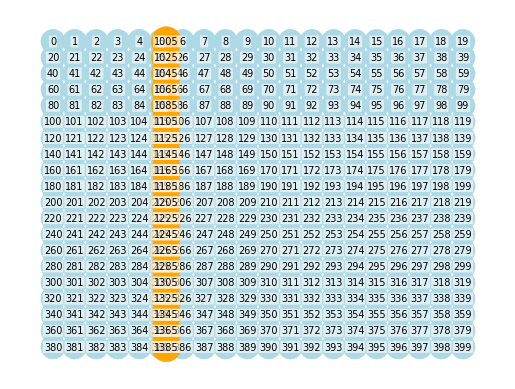

In [16]:
solution_ACO_path,cost_ACO,time_ACO,epochs_ACO = ACO(full_graph, start_node, end_node, num_ants, evaporation_rate, initial_pheromone_lvl, heuristic_weight, pheromone_weight, epomax)

print("results for ant_colony_simple (ACO)")
print(solution_ACO_path)
print("cost: ", cost_ACO)
print("time spent for a solution: ", time_ACO)
print("epochs: ", epochs_ACO)
draw_graph(full_graph,solution_ACO_path)


### Ant colony System (ACS)

In [ ]:
solution_ACS_path,cost_ACS,time_ACS,epochs_ACS = ACS(full_graph, start_node, end_node, num_ants, evaporation_rate, local_evap_rate, transition_prob, initial_pheromone_lvl, heuristic_weight, pheromone_weight, epomax)

print("results for ant_colony_system (ACS)")
print(solution_ACS_path)
print("cost: ", cost_ACS)
print("time spent for a solution: ", time_ACS)
print("epochs: ", epochs_ACS)
draw_graph(full_graph, solution_ACS_path)


### Best-Worst Ant Colony

In [ ]:
solution_ABW_path,cost_ABW,time_ABW,epochs_ABW = ABW(full_graph, start_node, end_node, num_ants, evaporation_rate, epomax, initial_pheromone_lvl, heuristic_weight, pheromone_weight)

print("results for ant_colony_best_worst (ABW)")
print(solution_ABW_path)
print("cost: ", cost_ABW)
print("time spent for a solution: ", time_ABW)
print("epochs: ", epochs_ABW)
draw_graph(full_graph, solution_ABW_path)

### Max-Min Ant Colony System

In [ ]:
solution_ACS_MAXMIN_path,cost_ACS_MAXMIN,time_ACS_MAXMIN,epochs_ACS_MAXMIN = ACS_MAXMIN(full_graph, start_node, end_node, num_ants, evaporation_rate, transition_prob, epomax, initial_pheromone_lvl, heuristic_weight, pheromone_weight)

print("results for ant_colony_MAXMIN (ACS_MAXMIN)")
print(solution_ACS_MAXMIN_path)
print("cost: ",cost_ACS_MAXMIN)
print("time spent for a solution: ", time_ACS_MAXMIN)
print("epochs: ", epochs_ACS_MAXMIN)
draw_graph(full_graph, solution_ACS_MAXMIN_path)